<a href="https://colab.research.google.com/github/mellisairawan/OrbitFutureAcademy2/blob/main/OFA_Mellisa_Irawan_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERVISED MACHINE LEARNING**

# **K-Nearest Neighbors**
Terdapat 3 jenis bunga iris yang agak sulit dibedakan yaitu Sentosa, Versicolor, dan Virginica. Untuk itu akan dibuat sebuah program dengan K-NN untuk memprediksi jenis bunga iris.

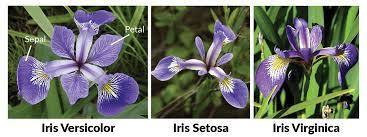

In [ ]:
# Import Library
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Import Dataset
Dataset yang digunakan adalah dataset ``Iris`` miliki ahli statistika biologi Inggris, Ronald Fisher, pada tahun 1936.
<br><br>
Dataset ini terdiri dari 3 spesies Iris yaitu Iris Setosa, Iris Virginica, dan Iris Versicolor dan tiap spesiesnya memiliki 50 sampel. Dalam data Iris terdapat 4 atribut yang dapat mempengaruhi klasifikasi yaitu..
- Sepal Length (panjang kelopak)
- Sepal Width (lebar kelopak)
- Petal length (panjang bunga)
- Petal width (lebar bunga)
<br> dalam centimeter

In [ ]:
# Import dataset
!wget -O iris.csv https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv

--2021-12-24 08:01:11--  https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4761 (4.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.65K  --.-KB/s    in 0s      

2021-12-24 08:01:12 (45.2 MB/s) - ‘iris.csv’ saved [4761/4761]



In [ ]:
# Load Dataset
df = pd.read_csv('iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Pre-processing Data

In [ ]:
# Mengetahui label dan jumlahnya masing-masing
df['Label'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Label, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3921966150>]],
      dtype=object)

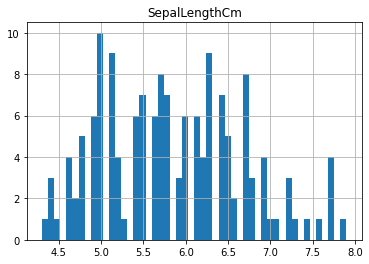

In [ ]:
df.hist(column='SepalLengthCm', bins=50)

### Membuat Variabel X dan Y

In [ ]:
# Membuat variabel X dan Y
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Label'].values

### Normalisasi Data
K-NN merupakan metode yang didasarkan pada kedekatan antar atribut. Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

In [ ]:
# Normalisasi Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

### Pembagian Data Training dan Testing
Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik. Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing.
<br><br>
Pembagian dataset dapat dilakukan dengan mekanisme A atau B sebagai berikut..
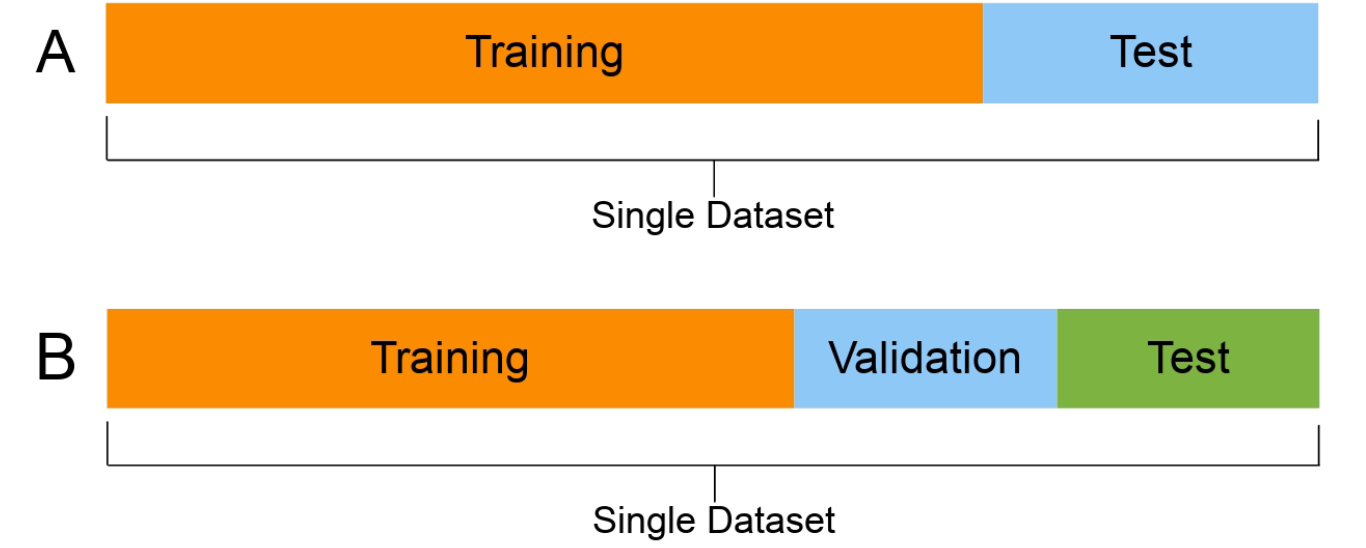

In [ ]:
# Pembagian Data Training dan Testing
# Menggunakan mekanisme A
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


## Membuat Model K-NN

In [ ]:
# import library
from sklearn.neighbors import KNeighborsClassifier

# Training
# Coba gunakan nilai k = 4
k = 4
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

# Predicting
yhat = knn.predict(X_test)
print(yhat[0:5])

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']


## Evaluasi Model

### Perhitungan Akurasi
Pada klasifikasi multi-kelas, nilai akurasi secara sederhana dapat dihitung dengan membandingkan kelas hasil prediksi algoritma dengan kelas sebenarnya.

In [ ]:
# Perhitungan akurasi
from sklearn import metrics
print("Train set accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set accuracy:  0.9666666666666667
Test set accuracy:  0.9333333333333333


### Mencari Nilai "K" Terbaik
Performa dari model K-NN sangat bergantun pada nilai K. Berikut adalah cara memilih nilai K terbaik untuk nilai k = 1 sampai k = 10.

In [ ]:
Ks = 10 # Batas nilai K yang diuji dimulai dari 1
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = []

for n in range(1,Ks):
  # Train model and predict
  neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) #indexing dikurangi 1 untuk menyesuaikan indexing Pyhon
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

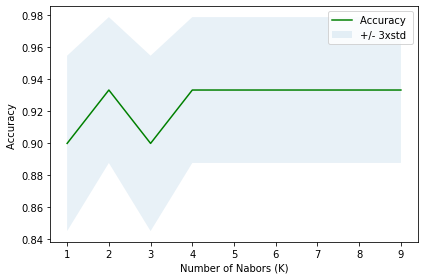

In [ ]:
# Visualisasi nilai akurasi K-NN untuk K yang berbeda-beda
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1*std_acc, mean_acc + 1*std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.9333333333333333 with k = 2


# **Regresi Linear**
Regresi Linear mempunyai 5 asumsi yang perlu dipenuhi. Asumsi ini sebenarnya wajib dalam teori ilmu statistika, namun dalam praktik *machine learning* proses ini kadang diabaikan karena ketidaktahuan. Uji asumsi ini berfungsi untuk mengetahui ketepatan estimasi dan menjauhkan dari bias..
1. Hubungan (korelasi) linear antara *feature* dan *label*
2. Uji normalitas
3. Tidak terjadi Heteroskedastisitas
4. Tidak terdapat multikolinearitas (untuk regresi berganda)
5. Tidak terdapat autokorelasi

<br>
Akan diuji kelima asumsi diatas sambil membuat model regresi linear dari dataset ``50_Startups``.
<br>
Sumber: Multivariate Data Analysis oleh Hair



## Import Library

In [ ]:
# Import Library
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
# import scikit_posthocs as sp
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [ ]:
# Import dataset
! wget -O 50_Startups.csv https://www.dropbox.com/s/z2ue4a1ogefcuo3/50_Startups.csv?dl=0

df = pd.read_csv('50_Startups.csv')
print(df.head())
print(df.info())

--2021-12-24 08:01:13--  https://www.dropbox.com/s/z2ue4a1ogefcuo3/50_Startups.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/z2ue4a1ogefcuo3/50_Startups.csv [following]
--2021-12-24 08:01:13--  https://www.dropbox.com/s/raw/z2ue4a1ogefcuo3/50_Startups.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc44845113dd11b2469820112f40.dl.dropboxusercontent.com/cd/0/inline/BcdizTBkbKv9pc6PBAiZavaysnOIXroKM2CbaB5cmA-xKUId1yDRQlLMfsh0XWMjVuOFB2jF_YBLhKmENkd9vMOz6sGJUtA_k9pb1H6-0flhFbi1BQ-iQX8yyREy3aROb7WMPJgRBny1jjMXaZDv_19N/file# [following]
--2021-12-24 08:01:13--  https://uc44845113dd11b2469820112f40.dl.dropboxusercontent.com/cd/0/inline/BcdizTBkbKv9pc6PBAiZavaysnOIXroKM2CbaB5cmA-xKUId1yDRQlLMfsh0XWMjVuOFB2jF_YB

## Uji 1: Hubungan linear antara Feature dan Label (X dan Y)

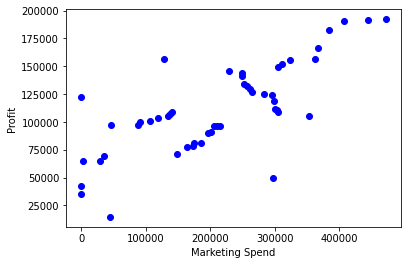

In [ ]:
# Visuaslisai variabel X (Marketing Spend) dan Y (Profit)
plt.scatter(df['Marketing Spend'], df['Profit'], color='blue')
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

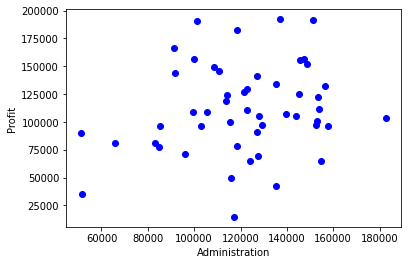

In [ ]:
# Visuaslisai variabel X (Administration) dan Y (Profit)
plt.scatter(df['Administration'], df['Profit'], color='blue')
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

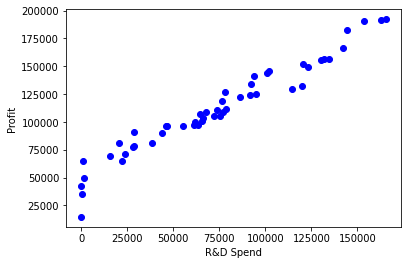

In [ ]:
# Visuaslisai variabel X (R&D Spend) dan Y (Profit)
plt.scatter(df['R&D Spend'], df['Profit'], color='blue')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

Terlihat bahwa `R&D Spend` dan `Marketing Spend` memiliki plot yang cenderung membentuk garis lurus keatas. Hal ini menunjukkan `R&D Spend` dan `Marketing Spend` memiliki hubungan yang kuat dengan `Profit`, sementara `Administration` memiliki plot yang cenderung berpencar terhadap `Profit`.

## Uji 2: Uji Normalitas
Dibagian ini yang diuji adalah normalitas residual (errornya). Mengapa? Karena menurut sifat distribusi normal, jika error normal dan modelnya linier, maka koefisien regresinya juga berdistribusi normal (terhindar dari bias outlier).

In [ ]:
features = ['R&D Spend', 'Marketing Spend'] # x1 = R&D, x2 = Marketing
X = df[features].values
Y = df.Profit
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

print(f'Coeficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X,Y)}')

Coeficients: [0.79658404 0.02990788]
Intercept: 46975.86422071999
R^2 score: 0.9504503015559763


KstestResult(statistic=0.11368328760156177, pvalue=0.5101193088472268)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


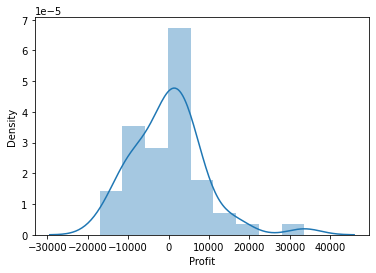

In [ ]:
y_pred = lin_reg.predict(X)
err = y_pred - Y
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm') # uji Kolmogorov-Smirnov, salah 1 uji normalitas
print(norm_er)

Ho : data berdistribusi normal<br>
Ha : data tidak berdistribusi normal<br>
Karena ``p value`` > 0.05, maka Ho diterima. Gambar histogram yang membentuk lonceng pun mendukung bahwa error datanya berdistribusi normal.

## Uji 3: Membuktikan Tidak terjadi Heteroskedastisitas
Homoskedastisitas adalah kondisi ketika nilai residu/error pada tiap nilai prediksi bervariasi dan variasinya cenderung konstan. Lawan dari homoskedastisitas adalah heteroskedastisitas, dimana error cenderung berubah dan malah berkorelasi dengan prediksinya. Jika ini terjadi tentu menunjukkan bahwa prediksi ini memiliki suatu bias tertentu. Untuk mengeceknya dapat dilihat dari plotnya.

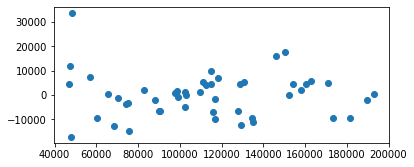

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.scatter(y_pred, err)

Terlihat plot errornya berada di sekitar angka yang sama meski nilai prediksinya bertambah. Artinya nilai prediksi kita tidak terganggu oleh errornya. 
<br><br>
Berikut adalah contoh plot jika terjadi heteroskedastisitas, plotnya membentuk pola tertentu yang menunjukkan bahwa nilai prediksinya masih berkorelasi dengan error sehingga nilai prediksi kita masih terganggu oleh nilai errornya.

![alt text](https://drive.google.com/uc?id=1VX4X3w95lBlTphDXg9Ez2Rv9Ky3tUz8e)

Cara lain untuk menguji homoskedastisitas: Glejser Test, White test, Breusch-Pagan test


## Uji 4: Membuktikan Tidak terjadi Multikolinearitas (Regresi Berganda)
Multikolinearitas adalah hubungan yang kuat antar *feature*. Regresi linear mengasumsikan bahwa *feature-feature*nya tidak saling berhubungan. Tentu saja ini hanya berlaku untuk regresi linear berganda (yang *feature*nya lebih dari 1). Salah 1 cara mengujinya adalah dengan menggunakan nilai VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X,i) for i in range(len(X.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features).T #transpose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,R&D Spend,Marketing Spend
VIF,7.156216,7.156216


Some papers argue that a VIF < 10 is acceptable, but other says that the limit value is 5.
- "10" as the maximum level of VIF (Hair et al., 1995)
- "5" as the maximum level of VIF (Ringle et al., 2015)

<br>
Jadi berdasarkan kriteria Hair, maka tidak akan terjadi kolinearitas. Tetap jika berdasarkan kriteria Ringle, masih terjadi kolinearitas. Disini akan digunakan teori dari Hair

## Uji 5: Membuktikan Tidak terjadi Autokorelasi
Autokorelasi adalah hubungan yang erat antar *entry, misalnya antara data ke-4 dengan ke-5, data ke-6 dengan data ke-7. Ini juga harus dihindari dalam regresi linear. 

In [ ]:
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(Y, X_constant).fit() # OLS: Ordinary Least Squares
# In OLS method, we have to choose the values of b_1 and b_0 ..
# such that, the total sum of squares of the difference between .. 
# the calculated and observed values of y, is minimised.

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           2.16e-31
Time:                        08:01:15   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![alt text](https://drive.google.com/uc?id=1iz2TAjhoquwj6nztVU9poi79-8-Bkda_)


Download DW table: https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf. Karena nilai dw = 1.257 < dL= 1.462, maka disini tidak ada masalah autokorelasi

## Evaluasi Hasil Regresi Linear
Kelebihan dari regresi linar dari model machine learning adalah mudah diinterpretasi dan dapat memberikan insight berapa besar pengaruh suatu feature terhadap labelnya. Berikut interpretasi jika menggunakan tingkat kepercayaan 95%:...

**1.   Signifikansi pengaruh feature secara sendiri-sendiri.**  nilai di kolom "P>|t|" yang menunjukkan pvalue dari x1 (R&D) dan x2 (marketing). Terlihat bahwa pvalue x1 < 0.05 dan pvalue x2 > 0.05. Artinya pengaruh R&D terhadap profit perusahaan signifikan sementara pengaruh marketing belum signifikan. 

**2. Besar pengaruh tiap feature.** kolom "coef", pada x1 (R&D) nilainya 0.7966, artinya setiap perusahaan menaikkan kinerja R&D 1 level saja mampu meningkatkan profit perusahaan sebesar 0.7966. Sementara koefisien x2 (marketing) sebesar 0.0299. Artinya selama ini pengaruh marketing terhadap profit hanya 0.0299.

**3.   Pengaruh kedua variabel secara bersamaan.** Nilai Prob (F-statistic)=	2.16x 10^(-31). Nilai ini menunjukkan signifikansi pengaruh kedua feature secara bersamaan, karena nilainya < 0.05, maka dapat disimpulkan pengaruh keduanya secara bersamaan terhadap labelnya signifikan.

**4. Evaluasi keseluruhan.** Model ini memiliki R2 sebesar 0.95. Artinya 95% variasi dari keseluruhan profit sudah tergambar dalam model ini, sementara sisanya yaitu 5% dipengaruhi faktor lain yang belum ada di model ini.  R2 merupakan metric yang digunakan untuk mengevaluasi model regresi linier yang bagus

# **Naive-Bayes**
Akan dibangun model Gaussian Naive Bayes untuk memprediksi Diabetes berdasarkan karakteristik-karakteristik tertentu (Jumlah kehamilan, Glukosa, Tekanan Darah, Ketebalan Kulit, Insulin, dan BMI).<br><br>
Sebagai pengingat, berikut adalah persamaan Gaussian Naive Bayes: <br>
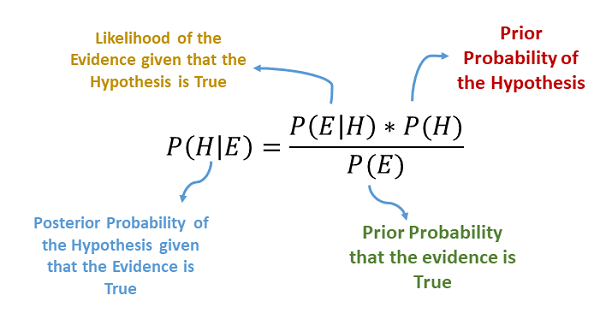

In [ ]:
# import Library
import numpy as np
import pandas as pd

# other dependencies that you might not need
# just for publishing image in notebook
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib  inline

In [ ]:
# Import Data
column = ["Pregnancies",
          "Glucose",
          "BloodPressure",
          "SkinThickness",
          "Insulin",
          "BMI",
          "DiabetesPedigreeFunction",
          "Age",
          "Outcome"]
path = "https://raw.githubusercontent.com/2796gaurav/Naive-bayes-explained/master/Naive%20bayes/pima-indians-diabetes.data.csv"
data = pd.read_csv(path, names=column)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Membuat data X dan Y
X = data.iloc[:,0:-1] # X is the features in our dataset
y = data.iloc[:,-1] # y is the labels in our dataset

In [ ]:
# Memisah data menjadi data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Membuat model Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train, y_train)
predicted_y = model.predict(X_test)

In [ ]:
# Evaluasi model
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, predicted_y)
print(accuracy_score)

0.7402597402597403


The model has 75% accuracy. It means it is accurate about the result 78%

In [ ]:
# Menguji model dengan input random

# Membuat dataframe kosong
person = pd.DataFrame()

# Menentukan nilai feature yang ingin diprediksi
person['Pregnancies'] = [7]
person['Glucose'] = [130]
person['BloodPressure'] = [86]
person['SkinThickness'] = [34]
person['Insulin'] = [0]
person['BMI'] = [33.5]
person['DiabetesPedigreeFunction'] = [0.564]
person['Age'] = [50]

# View
person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,130,86,34,0,33.5,0.564,50


In [ ]:
# Memprediksi data yang disimpan dalam dataframe baru
y_predict = model.predict(person)

print(y_predict)

[1]


Model memprediksi bahwa orang dengan karakteristik random yang diinputkan tadi akan berpotensi mempunyai diabetes.

# **UNSUPERVISED LEARNING**

# **K-Means**
Berikut adalah yang akan dilakukan pada *source code* ini.
1. Akan dilakukan implementasi clustering K-Means dengan membuat algoritma ini menggunakan Python. Data yang digunakan adalah ``loan prediction dataset``
2. Akan diimplementasi clustering K-Means dengan bantuan library ScikitLearn.

## **1. K-means From Scratch**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
# Import dataset
data = pd.read_csv("https://raw.githubusercontent.com/mellisairawan/OrbitFutureAcademy2/main/loan_prediction_dataset.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


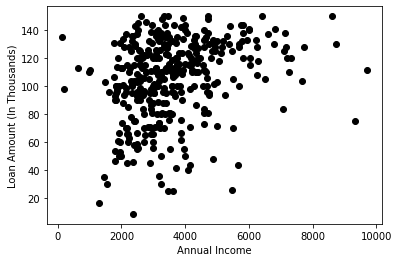

In [ ]:
# Akan diambil 2 features saja yaitu "LoanAmount" dan "ApplicantIncome"
X = data[["LoanAmount", "ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

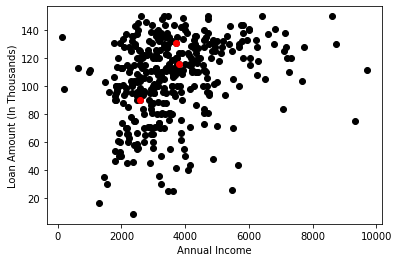

In [ ]:
# Step 1: Memilih jumlah cluster (K) secara random
# Step 2: Memilih letak centroid secara random untuk masing-masing cluster.

# Jumlah cluster
K = 3

# Pilih koordinat random sebagai centroid
centroids = X.sample(n=K)
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.scatter(centroids["ApplicantIncome"], centroids["LoanAmount"], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Titik merah menunjukkan 3 centroid untuk setiap cluster. **PENTING!** Kita memilih centroid secara random sehingga setiap running code ini akan mendapatkan letak centroid yang berbeda.

In [ ]:
# Step 3: Tetapkan point-point ke centroid cluster terdekat
# Step 4: Hitung ulang centroid pada cluster yang telah terbentuk
# Step 5: Ulangi step 3 dan step 4

diff = 1
j = 0

while (diff != 0): #iterasi samapai perubahan letak centroid adalah nol
  XD = X #dummy variable
  i = 1
  for index1, row_c, in centroids.iterrows():
    ED = [] # euclian distance
    for index2, row_d in XD.iterrows():
      d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"])**2
      d2 = (row_c["LoanAmount"] - row_d["LoanAmount"])**2
      d = np.sqrt(d1+d2) # menghitung euclian distance dari suatu titik ke centroid
      ED.append(d)
    X[i] = ED # simpan nilai euclian distance....
    i = i + 1 # terhadap masing-masing i=1, i=2, i=3 (nomor cluster)

  C = [] # variabel untuk menyimpan nomor cluster
  for index, row in X.iterrows(): #menentukan cluster dengan nilai distance terkecil
    min_dist = row[1] 
    pos = 1
    for i in range(K):
      if row[i+1] < min_dist:
        min_dist = row[i+1]
        pos = i+1
    C.append(pos)
  X["Cluster"] = C # nilai variabel adalah nomor cluster dengan nilai distance terkecil
  centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]

  if j == 0:
    diff = 1
    j = j+1
  else:
    diff = (centroids_new['LoanAmount'] - centroids['LoanAmount']).sum() + (centroids_new['ApplicantIncome'] - centroids['ApplicantIncome']).sum()
    print(diff.sum())
  
  centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


307.8912291080387
241.07474261969745
243.67751530068898
275.4594653629904
193.23165469331707
223.0009026851808
196.09239747916192
79.92911979701171
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


Nilai-nilai ini akan berubah setiap menjalankan codenya. Pada awalnya nilai ``diff`` adalah 1, kemudian dengan looping dikalkulasi ``diff`` ini hingga mendekati nol. ``diff`` adalah perbedaan nilai centroid pada iterasi saat ini dengan iterasi sebelumnya.

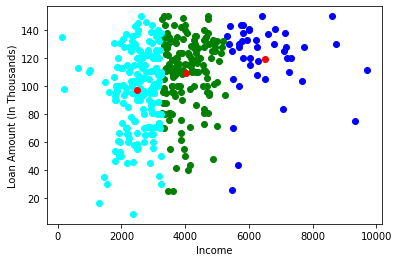

In [ ]:
color = ['blue', 'green', 'cyan']
for k in range(K):
  data = X[X["Cluster"] == k+1]
  plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k])

plt.scatter(centroids["ApplicantIncome"], centroids["LoanAmount"], c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

## **2. K-Means with Clustering Algorithm**
Pada bagian ini akan digunakan masalah "Wholesale Customer Segmentation". Tujuan dari masalah ini adalah untuk mengsementasi klien-klien dari *wholesale distributor* berdasarkan pengeluaran tahuan pada bermacam jenis produk, dll.

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
# Membaca dan melihat data
data = pd.read_csv("https://raw.githubusercontent.com/mellisairawan/OrbitFutureAcademy2/main/Wholesale%20customers%20data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Statistik dari dataset
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Standarisasi Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled= scaler.fit_transform(data)

# Statistik dari data yang terstandarisasi
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [ ]:
# Mendefinisikan fungsi K-MEans dengan inisialisasi sebagai "K-Means++"
kmeans = KMeans(n_clusters=2, init='k-means++')

# Fit data ke algoritma K-Means
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [ ]:
# Inersia dari data
kmeans.inertia_

2599.3855593561393

Text(0, 0.5, 'Inertia')

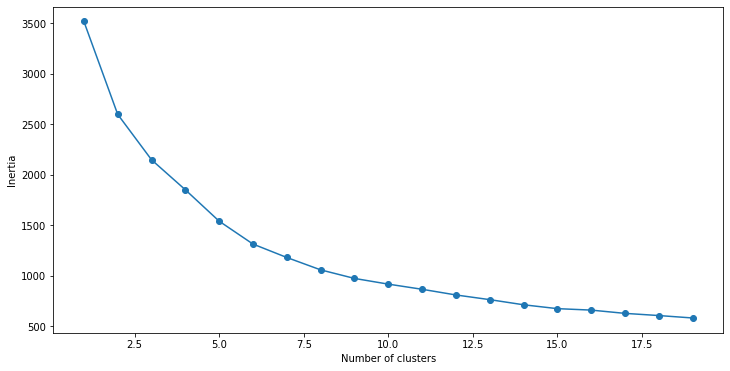

In [ ]:
# Fit beberapa algoritma K-Means dan menyimpan nilainya dalam list

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_init = 10, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# k means dengan 5 clusters dan k-means++ initialization
kmeans = KMeans(n_init=10, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled) # membuat prediksi

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    207
0    126
2     91
3     10
4      6
Name: cluster, dtype: int64

# **Decision Tree**

In [ ]:
# Import Library
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Load dataset
column = ["Pregnancies",
          "Glucose",
          "BloodPressure",
          "SkinThickness",
          "Insulin",
          "BMI",
          "DiabetesPedigreeFunction",
          "Age",
          "Outcome"]
path = "https://raw.githubusercontent.com/2796gaurav/Naive-bayes-explained/master/Naive%20bayes/pima-indians-diabetes.data.csv"
pima = pd.read_csv(path, names=column)
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Split dataset menjadi variabel X dan Y
X = pima.iloc[:, :8]
y = pima.iloc[:, 8]

# Split dataset menjadi dataset training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model Decision Tree Classifier Object
clf = DecisionTreeClassifier()

# Train model
clf = clf.fit(X_train, y_train)

# Predict respon dari dataset
y_pred = clf.predict(X_test)

# Akurasi model
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7597402597402597


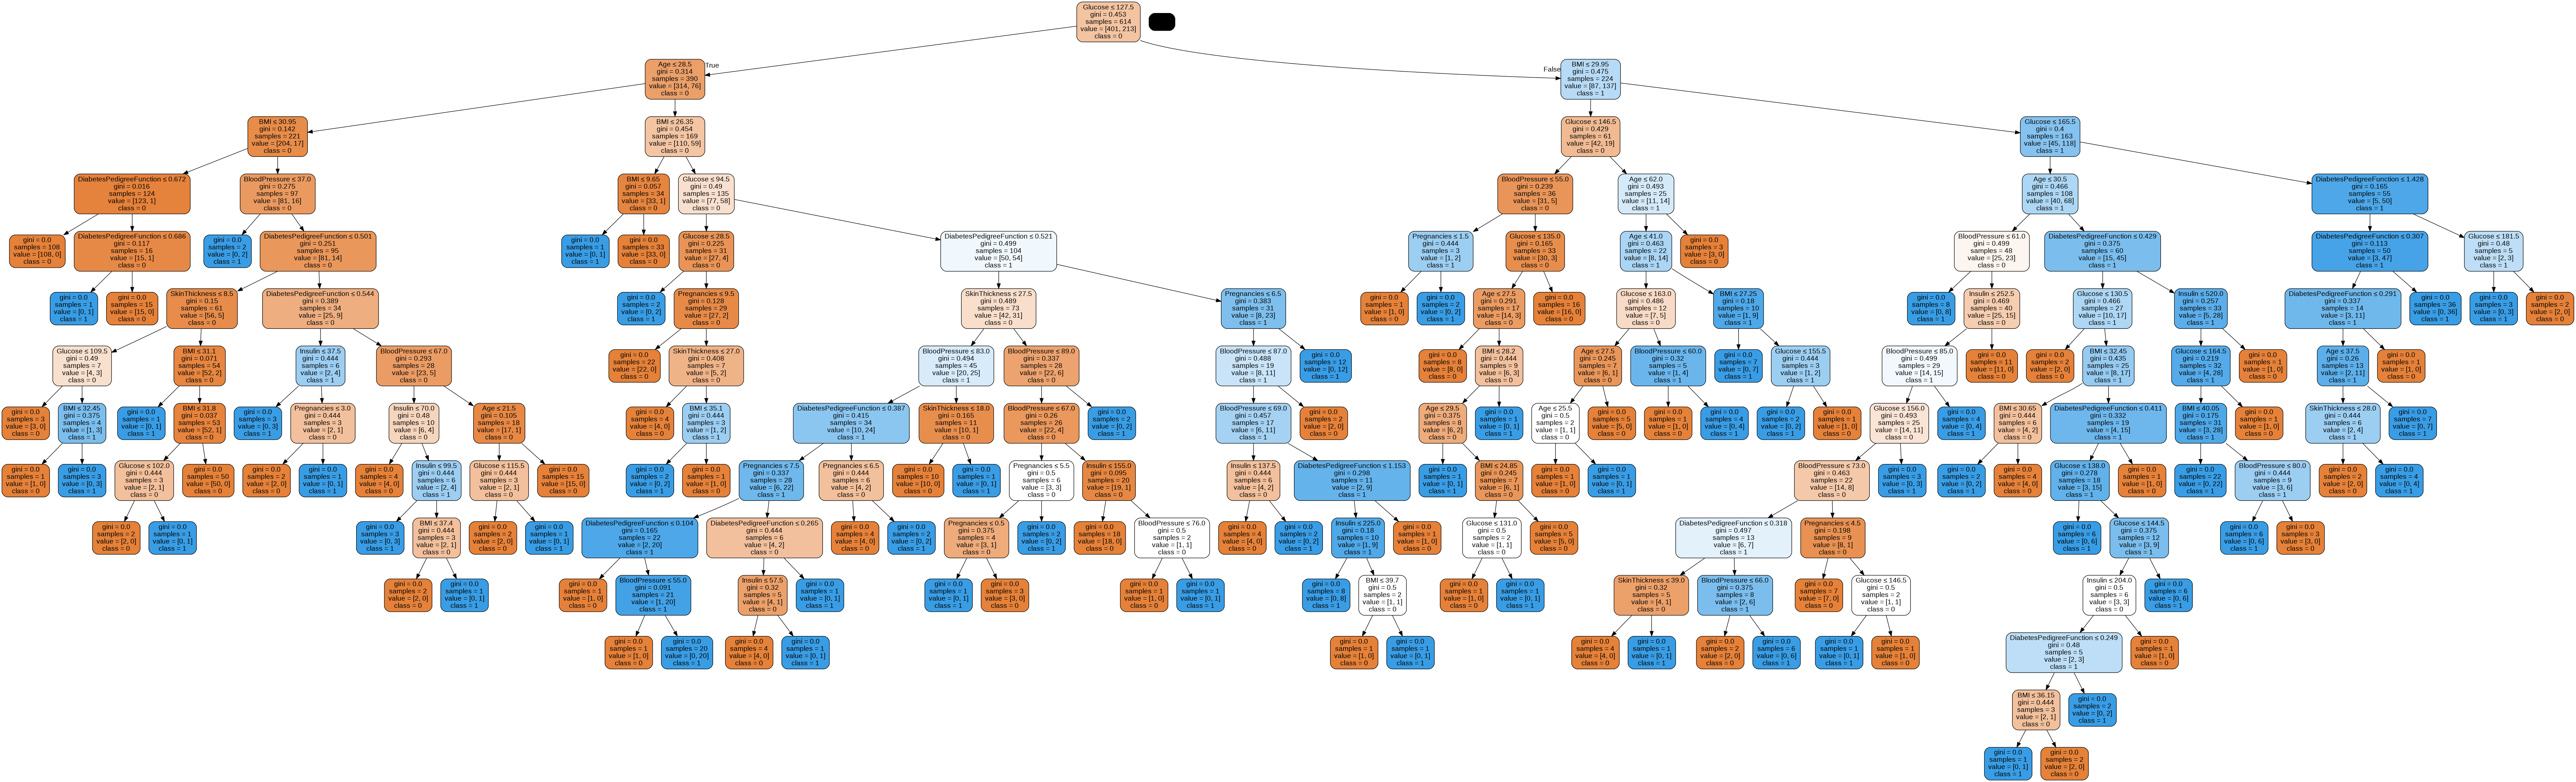

In [ ]:
# Memunculkan ilustrasi Decision Tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=column[:8], 
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
column[:8]

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## Agglomerative Clustering
Pendekatan *bottom-up*.  Algoritma ini memperlakukan setiap data sebagai kluster tunggal dan kemudian secara berurutan menggabungkan manjadi satu kluster yang berisi semua data.

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
# Import data
path = "https://raw.githubusercontent.com/mellisairawan/OrbitFutureAcademy2/main/CC%20GENERAL.csv"
X = pd.read_csv(path)
X

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# Cleaning Data
# Drop kolom CUST_ID
X = X.drop('CUST_ID', axis=1)

# Mengisi missing values
X.fillna(method='ffill', inplace=True)

In [ ]:
# Preprocessing Data
# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalisasi data sehingga data mengikuti distribusi Gaussian
X_normalized = normalize(X_scaled)

# Mengubah array ke pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
# Mengurangi dimensionalitas dari data
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

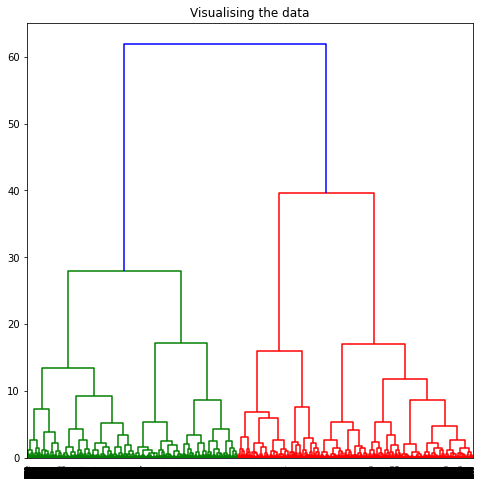

In [ ]:
# Akan digunakan dendrogram untuk membagi kluster ke banyak kluster berbeda
# Visualisasi bagaimana dendogram berkeja
plt.figure(figsize=(8,8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='ward')))

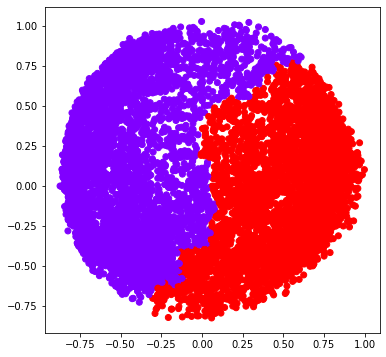

In [ ]:
# Membangun dan Visualisasi model klustering untuk nilai "k" yang berbeda
# k = 2
ac2 = AgglomerativeClustering(n_clusters=2)

# Visualizing the clustering
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], 
            X_principal['P2'],
            c=ac2.fit_predict(X_principal),
            cmap='rainbow')
plt.show()

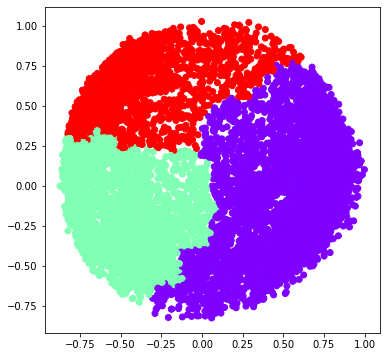

In [ ]:
# k = 3
ac3 = AgglomerativeClustering(n_clusters=3)

# Visualizing the clustering
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], 
            X_principal['P2'],
            c=ac3.fit_predict(X_principal),
            cmap='rainbow')
plt.show()

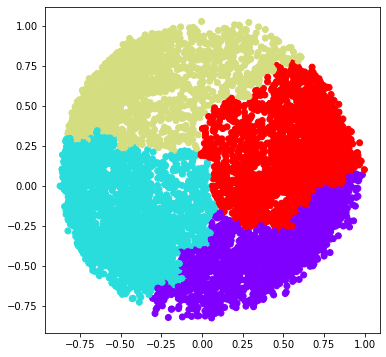

In [ ]:
# k = 4
ac4 = AgglomerativeClustering(n_clusters=4)

# Visualizing the clustering
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], 
            X_principal['P2'],
            c=ac4.fit_predict(X_principal),
            cmap='rainbow')
plt.show()

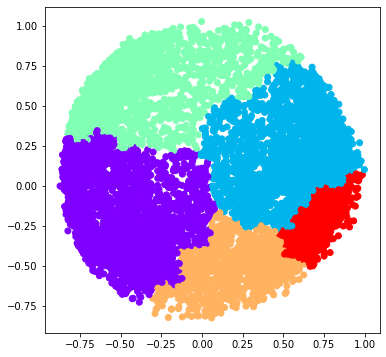

In [ ]:
# k = 5
ac5 = AgglomerativeClustering(n_clusters=5)

# Visualizing the clustering
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], 
            X_principal['P2'],
            c=ac5.fit_predict(X_principal),
            cmap='rainbow')
plt.show()

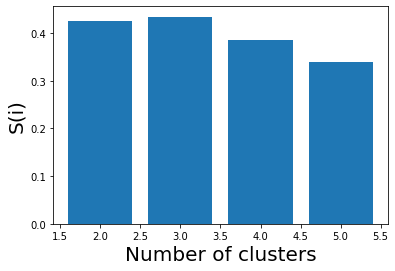

In [ ]:
k = [2, 3, 4, 5]
  
# Membuat silhoette score dari model yang berbeda-beda
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))

  
# Plot grafik untuk membandingkan hasil
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()